C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


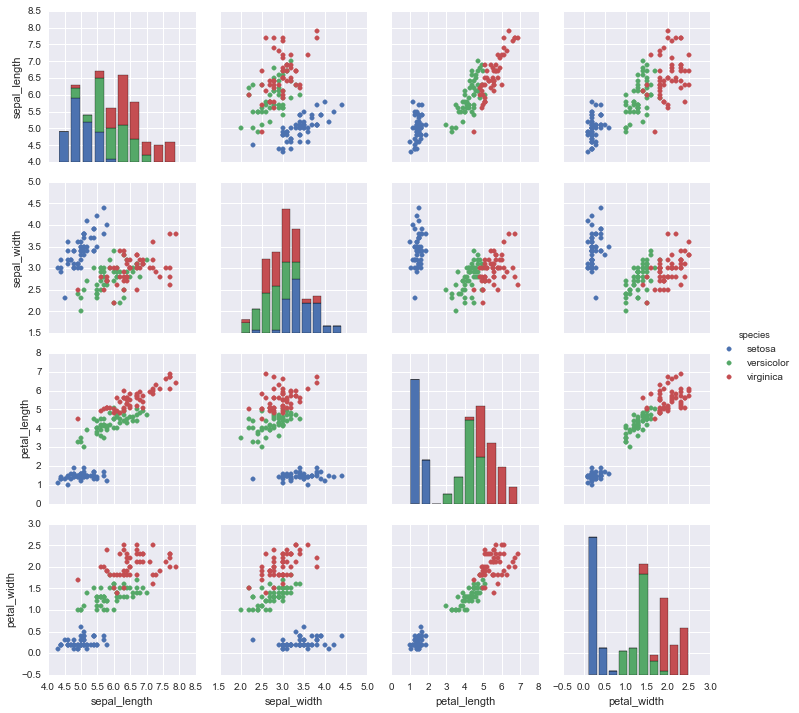

In [1]:
# ukazeme si neco malo ze seaborn knihovny
%matplotlib inline
import seaborn as sns
sns.set()

# krasna vizualizace na jednu radku
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In [2]:
import pandas as pd
data = pd.read_csv('predict249-01.csv', delimiter=',')
data.describe()

,symIndex,startDay,delta1,delta2,delta3,nowEndDelta
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,131.233333,3074.540000,0.000000,0.000000,0.000000,0.000000
std,73.442665,1766.489577,0.019203,0.022543,0.016355,0.817861
min,1.000000,5.000000,-0.066667,-0.119534,-0.064976,-1.000000
25%,65.000000,1517.000000,-0.009057,-0.010428,-0.008580,-1.000000
50%,146.000000,3309.500000,0.000000,-0.000000,-0.000000,0.000000
75%,195.000000,4475.000000,0.009057,0.010428,0.008580,1.000000
max,246.000000,6195.000000,0.066667,0.119534,0.064976,1.000000


-1    100
 0    100
 1    100
Name: nowEndDelta, dtype: int64


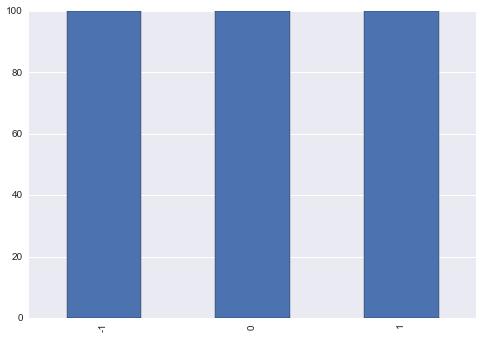

In [3]:
# spocitame a nakreslime histogram jednotlivych trid
counts = data['nowEndDelta'].value_counts(sort=False).sort_index()
counts.plot(kind='bar')
print(counts)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


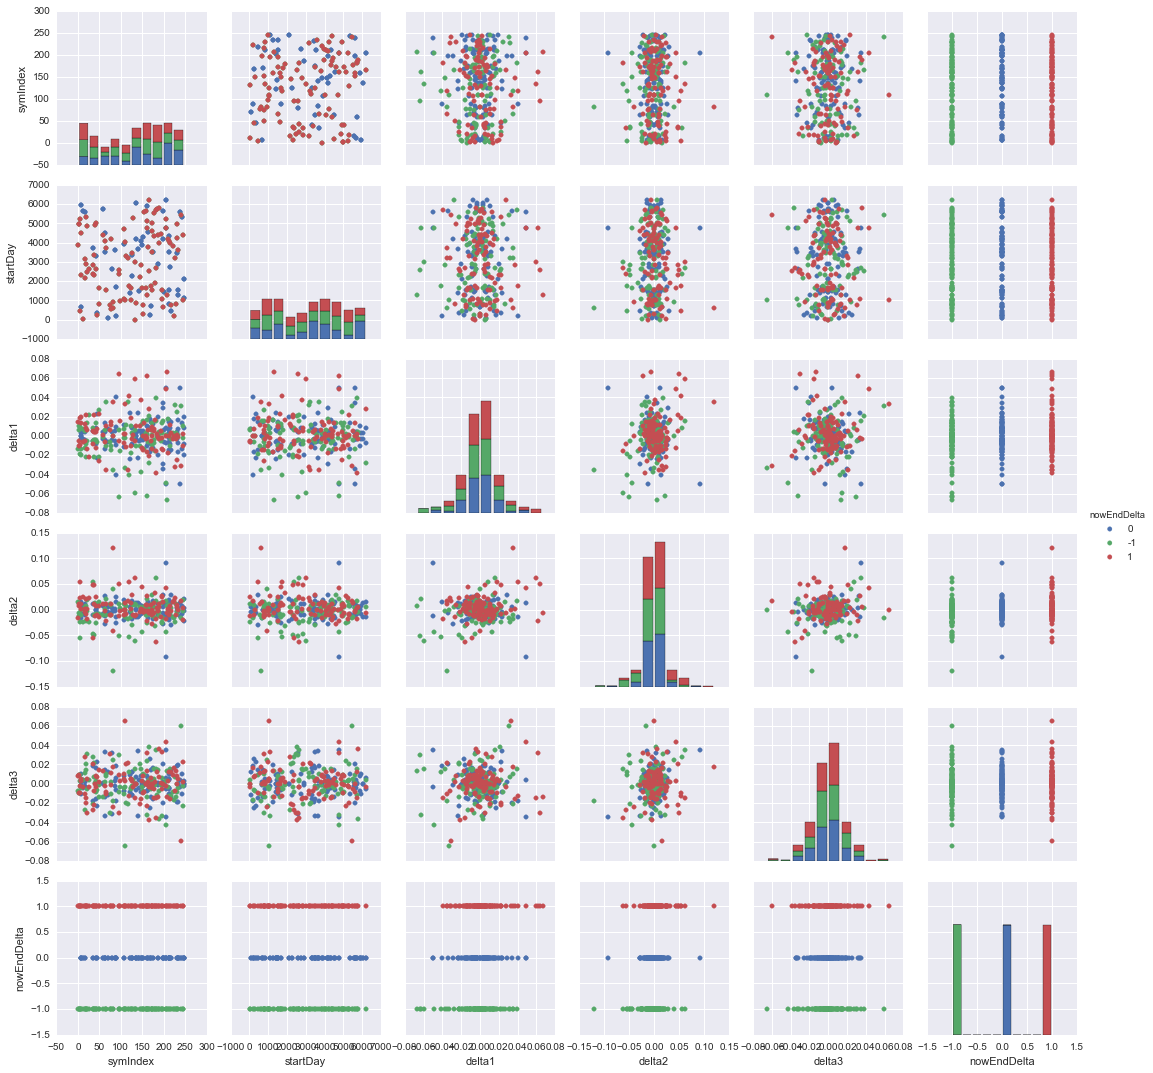

In [4]:
# znama vizualizace, tentokrat pro vetsi data
sns.pairplot(data, hue='nowEndDelta')

In [5]:
# zkusime jeste snizit dimenzionalitu dat
from sklearn import decomposition
from sklearn import manifold

attr = data.drop('nowEndDelta', axis=1)

# pomoci PCA
clf = decomposition.PCA(n_components=2)
data2Dpca = clf.fit_transform(attr)

# a pomoci t-SNE
clf2 = manifold.t_sne.TSNE(n_components=2)
data2Dtsne = clf2.fit_transform(attr)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


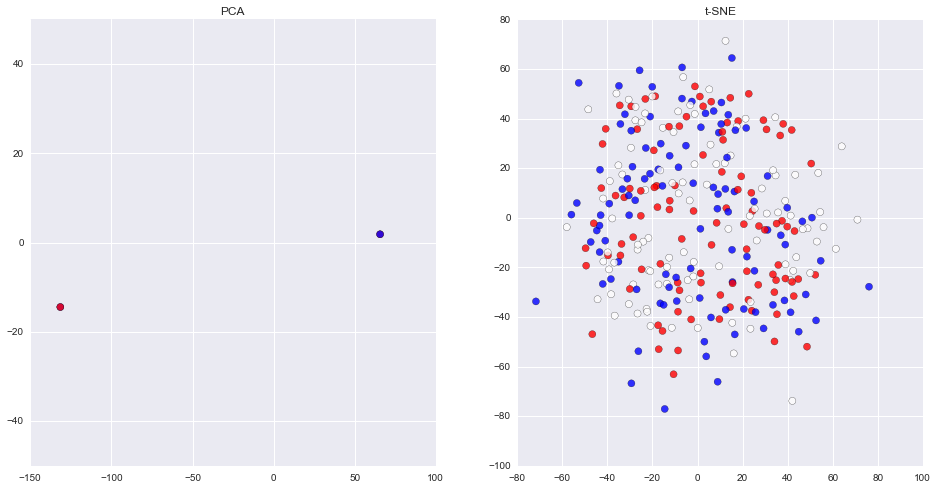

In [6]:
# nakreslime projekce pomoci PCA a pomoci t-SNE
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(data2Dpca[:, 0], data2Dpca[:, 1], c=data.nowEndDelta, cmap=plt.get_cmap('bwr'), s=50, alpha=0.8)
plt.ylim([-50, 50])
plt.xlim([-150, 100])
plt.title('PCA')
plt.subplot(1,2,2)
plt.scatter(data2Dtsne[:, 0], data2Dtsne[:, 1], c=data.nowEndDelta, cmap=plt.get_cmap('bwr'), s=50, alpha=0.8)
plt.title('t-SNE')
plt.show()